In [1]:
from triage.component.audition import Auditioner
from triage.component.audition.pre_audition import PreAudition
from triage.component.audition.rules_maker import SimpleRuleMaker, RandomGroupRuleMaker, create_selection_grid

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import yaml
import sqlalchemy

import logging
logging.basicConfig(level=logging.WARNING)

import pandas as pd
pd.set_option('precision', 4)

import numpy as np

In [2]:
with open('database.yaml') as fd:
    config = yaml.load(fd, Loader=yaml.FullLoader)
    dburl = sqlalchemy.engine.url.URL(
        "postgres",
        host=config["host"],
        username=config["user"],
        database=config["db"],
        password=config["pass"],
        port=config["port"],
    )
    conn = sqlalchemy.create_engine(dburl, poolclass=sqlalchemy.pool.QueuePool)

In [3]:
feature_query = "select feature from train_results.feature_importances where model_id=31403"
all_features = pd.read_sql(feature_query, conn)['feature'].to_list()
all_features = [x[x.index('id_all')+7:] for x in all_features]

In [4]:
q = "select model_id, model_group_id, train_end_time from triage_metadata.models where model_group_id in\
    (1613, 1611, 1604, 1609, 1610, 1601, 1612, 1570, 1571, 1572)"
experiment_info = pd.read_sql(q, conn)

In [5]:
def get_all_models(model_group_id):
    q = "select train_end_time, model_id from triage_metadata.models where model_group_id=" + \
        str(model_group_id) + \
        "order by train_end_time"
    models = pd.read_sql(q, conn)
    return dict(zip(models['train_end_time'].astype(str).to_list(), models['model_id'].to_list()))

In [6]:
def get_importance(model_id):
    q = "select feature, feature_importance from train_results.feature_importances where model_id=" + str(model_id) + "order by feature"
    features = pd.read_sql(q, conn)
    return features['feature_importance'].to_list()

In [7]:
def get_all_importance(model_group_id):
    all_importance = []
    for time, model_id in get_all_models(model_group_id).items():
        importance = get_importance(model_id)
        all_importance.append(importance)
    return np.array(all_importance).T

In [8]:
def plot(importance):
    x = range(importance.shape[1])
    offset = np.zeros(importance.shape[1])
#     colors = plt.cm.BuPu(np.linspace(0, 0.5, importance.shape[0]))
    for idx,row in enumerate(importance):
        plt.bar(x, row, bottom=offset)
        offset = offset + row
    plt.show()

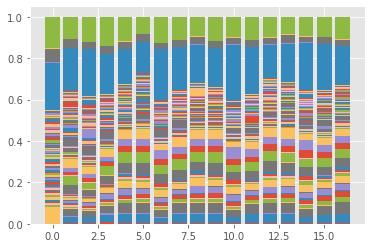

In [9]:
imp_1613 = get_all_importance(1613)
plot(imp_1613)

In [10]:
def get_top(data, k):
    return (np.argsort(data.argsort(axis=0), axis=0) >= (data.shape[0]-k)) * data
def get_top_mask(data, k):
    return (np.argsort(data.argsort(axis=0), axis=0) >= (data.shape[0]-k))

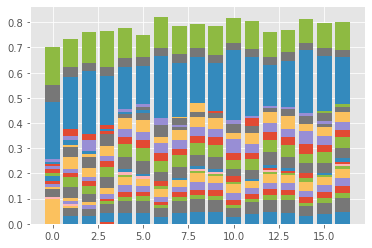

In [11]:
top_20 = get_top(imp_1613, 20)
plot(top_20)

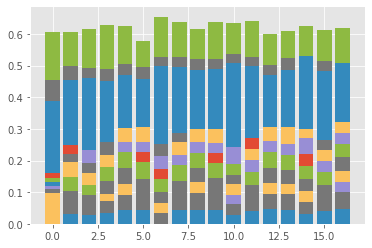

In [12]:
top_10 = get_top(imp_1613, 10)
plot(top_10)

In [13]:
top_10_m = get_top_mask(imp_1613, 10).sum(axis=1)

In [14]:
for idx in np.where(top_10_m > 10)[0]:
    print(all_features[idx])

district_avg_donations_1yr_sum
district_avg_donations_2yr_sum
zip_avg_donations_1yr_sum
zip_avg_donations_2yr_sum
zip_funding_rate_2yr_sum
length(essay)::int_sum
total_asking_price_sum
item_quantity_sum
item_unit_price_sum


In [15]:
for idx in np.where((top_10_m <= 10) & (top_10_m > 5))[0]:
    print(all_features[idx])

teacher_avg_donations_2yr_sum
resource_type_Technol_sum


In [17]:
top_20_m = get_top_mask(imp_1613, 20).sum(axis=1)
for idx in np.where(top_20_m > 10)[0]:
    print(all_features[idx])

district_avg_donations_1yr_sum
district_avg_donations_2yr_sum
district_funding_rate_1yr_sum
district_funding_rate_2yr_sum
teacher_avg_donations_1yr_sum
teacher_avg_donations_2yr_sum
zip_avg_donations_1yr_sum
zip_avg_donations_2yr_sum
zip_funding_rate_1yr_sum
zip_funding_rate_2yr_sum
length(essay)::int_sum
resource_type_Books_sum
resource_type_Technol_sum
total_asking_price_sum
item_quantity_sum
item_unit_price_sum


In [18]:
for idx in np.where((top_20_m <= 10) & (top_20_m > 5))[0]:
    print(all_features[idx])

teacher_funding_rate_1yr_imp
teacher_funding_rate_1yr_sum
teacher_funding_rate_2yr_imp
teacher_funding_rate_2yr_sum
school_state_Califor_sum
